<a href="https://colab.research.google.com/github/bkkaggle/pytorch-CycleGAN-and-pix2pix/blob/master/pix2pix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()
# !pip install -r requirements.txt

⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:06
🔁 Restarting kernel...


In [ ]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2619, done.
remote: Total 2619 (delta 0), reused 0 (delta 0), pack-reused 2619 (from 1)
Receiving objects: 100% (2619/2619), 8.24 MiB | 13.71 MiB/s, done.
Resolving deltas: 100% (1654/1654), done.


In [ ]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [ ]:
# !conda env update -n base -f environment.yml
# !pip install pytorch torchvision numpy scikit-image dominate Pillow wandb
!pip install torch
!pip install numpy
!pip install pillow
!pip install torchvision
!pip install dominate
!pip install wandb

# Datasets

Download one of the official datasets with:

-   `bash ./datasets/download_pix2pix_dataset.sh [cityscapes, night2day, edges2handbags, edges2shoes, facades, maps]`

Or use your own dataset by creating the appropriate folders and adding in the images. Follow the instructions [here](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix/blob/master/docs/datasets.md#pix2pix-datasets).

In [ ]:
# !bash ./datasets/download_pix2pix_dataset.sh facades

# Pretrained models

Download one of the official pretrained models with:

-   `bash ./scripts/download_pix2pix_model.sh [edges2shoes, sat2map, map2sat, facades_label2photo, and day2night]`

Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [ ]:
# !bash ./scripts/download_pix2pix_model.sh facades_label2photo

# Training

-   `python train.py --dataroot ./datasets/facades --name facades_pix2pix --model pix2pix --direction BtoA`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. Add `--direction BtoA` if you want to train a model to transfrom from class B to A.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!python train.py --checkpoints_dir "/content/drive/MyDrive/Universidad/Deep Learning/Proyecto FaceToPix/PaperData/checkpoints" --dataroot "/content/drive/MyDrive/Universidad/Deep Learning/Proyecto FaceToPix/PaperData" --name pixelart_pix2pix --model pix2pix --direction AtoB

Streaming output truncated to the last 5000 lines.

[Rank 0] (epoch: 81, iters: 780, time: 0.047, data: 0.001) , G_GAN: 4.283, G_L1: 28.347, D_real: 0.022, D_fake: 0.130

[Rank 0] (epoch: 81, iters: 880, time: 0.047, data: 0.001) , G_GAN: 4.117, G_L1: 26.341, D_real: 1.628, D_fake: 0.001

[Rank 0] (epoch: 81, iters: 980, time: 0.048, data: 0.002) , G_GAN: 2.693, G_L1: 34.736, D_real: 0.011, D_fake: 0.240

[Rank 0] (epoch: 81, iters: 1080, time: 0.047, data: 0.002) , G_GAN: 6.447, G_L1: 24.793, D_real: 0.087, D_fake: 0.003

[Rank 0] (epoch: 81, iters: 1180, time: 0.047, data: 0.002) , G_GAN: 5.707, G_L1: 27.029, D_real: 0.429, D_fake: 0.007

[Rank 0] (epoch: 81, iters: 1280, time: 0.188, data: 0.002) , G_GAN: 4.627, G_L1: 26.730, D_real: 1.174, D_fake: 0.002

[Rank 0] (epoch: 81, iters: 1380, time: 0.047, data: 0.002) , G_GAN: 5.145, G_L1: 28.779, D_real: 0.100, D_fake: 0.014

[Rank 0] (epoch: 81, iters: 1480, time: 0.047, data: 0.001) , G_GAN: 6.474, G_L1: 24.490, D_real: 0.032, D_fake

# Testing

-   `python test.py --dataroot ./datasets/facades --direction BtoA --model pix2pix --name facades_pix2pix`

Change the `--dataroot`, `--name`, and `--direction` to be consistent with your trained model's configuration and how you want to transform images.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> Note that we specified --direction BtoA as Facades dataset's A to B direction is photos to labels.

> If you would like to apply a pre-trained model to a collection of input images (rather than image pairs), please use --model test option. See ./scripts/test_single.sh for how to apply a model to Facade label maps (stored in the directory facades/testB).

> See a list of currently available models at ./scripts/download_pix2pix_model.sh

In [ ]:
!ls checkpoints/

ls: cannot access 'checkpoints/': No such file or directory


In [ ]:
!python test.py --checkpoints_dir "/content/drive/MyDrive/Universidad/Deep Learning/Proyecto FaceToPix/PaperData/checkpoints" --dataroot "/content/drive/MyDrive/Universidad/Deep Learning/Proyecto FaceToPix/PaperData" --model pix2pix --direction AtoB --name pixelart_pix2pix --use_wandb

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: /content/drive/MyDrive/Universidad/Deep Learning/Proyecto FaceToPix/PaperData/checkpoints	[default: ./checkpoints]
                crop_size: 256                           
                 dataroot: /content/drive/MyDrive/Universidad/Deep Learning/Proyecto FaceToPix/PaperData	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         

# Visualize

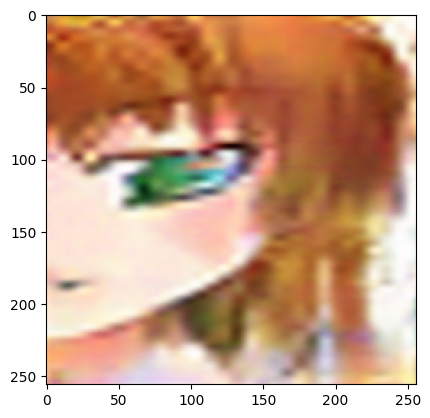

In [ ]:
import matplotlib.pyplot as plt

img = plt.imread('/content/pytorch-CycleGAN-and-pix2pix/results/pixelart_pix2pix/test_latest/images/10_fake_B.png')
plt.imshow(img)

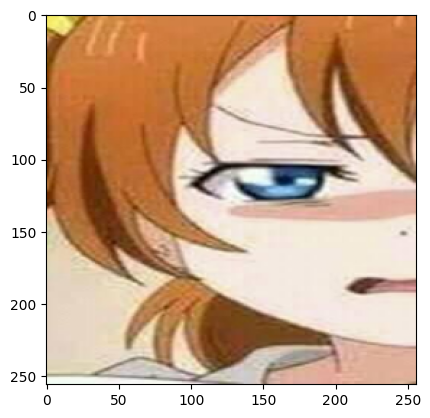

In [ ]:
img = plt.imread('/content/pytorch-CycleGAN-and-pix2pix/results/pixelart_pix2pix/test_latest/images/10_real_A.png')
plt.imshow(img)

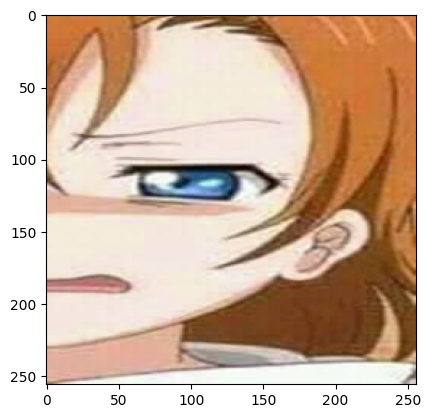

In [ ]:
img = plt.imread('/content/pytorch-CycleGAN-and-pix2pix/results/pixelart_pix2pix/test_latest/images/10_real_B.png')
plt.imshow(img)

In [ ]:
!zip -r /content/file.zip /content/pytorch-CycleGAN-and-pix2pix/results

  adding: content/pytorch-CycleGAN-and-pix2pix/results/ (stored 0%)
  adding: content/pytorch-CycleGAN-and-pix2pix/results/pixelart_pix2pix/ (stored 0%)
  adding: content/pytorch-CycleGAN-and-pix2pix/results/pixelart_pix2pix/test_latest/ (stored 0%)
  adding: content/pytorch-CycleGAN-and-pix2pix/results/pixelart_pix2pix/test_latest/index.html (deflated 93%)
  adding: content/pytorch-CycleGAN-and-pix2pix/results/pixelart_pix2pix/test_latest/images/ (stored 0%)
  adding: content/pytorch-CycleGAN-and-pix2pix/results/pixelart_pix2pix/test_latest/images/4_real_A.png (deflated 0%)
  adding: content/pytorch-CycleGAN-and-pix2pix/results/pixelart_pix2pix/test_latest/images/7_real_B.png (deflated 0%)
  adding: content/pytorch-CycleGAN-and-pix2pix/results/pixelart_pix2pix/test_latest/images/9_real_B.png (deflated 0%)
  adding: content/pytorch-CycleGAN-and-pix2pix/results/pixelart_pix2pix/test_latest/images/3_real_B.png (deflated 4%)
  adding: content/pytorch-CycleGAN-and-pix2pix/results/pixelart_